In [1]:
# Module importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Wuas

In [2]:
# Daten importieren
data = pd.read_excel("Mappe1_gabo.xlsx")
data

,Stunden,Punkte,Bestande
0,2,49,WHACK
1,7,38,WHACK
2,0,7,WHACK
3,12,129,Durchschnitt
4,1,4,WHACK
...,...,...,...
208,2,12,WHACK
209,5,58,Durchschnitt
210,7,61,Durchschnitt
211,8,79,Durchschnitt


In [3]:
# Datawrangling
data["Bestande"] = data["Bestande"].map({"WHACK":0,"Durchschnitt":1})
data

,Stunden,Punkte,Bestande
0,2,49,0
1,7,38,0
2,0,7,0
3,12,129,1
4,1,4,0
...,...,...,...
208,2,12,0
209,5,58,1
210,7,61,1
211,8,79,1


In [4]:
# X und Y Werte definieren
x = data["Stunden"].values.reshape(-1,1)
y = data["Bestande"].values

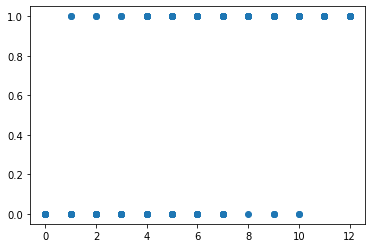

In [5]:
# Einfacher Scatter plot
plt.scatter(x,y)
plt.show()

In [6]:
# Data splitten in train und test
train, test = train_test_split(data, test_size=0.3)

In [7]:
# x und y fuer Train und Test definieren
x_train = train["Stunden"].values.reshape(-1,1)
y_train = train["Bestande"].values

x_test = test["Stunden"].values.reshape(-1,1)
y_test = test["Bestande"].values


In [8]:
# Logistische Regressions model erstellen
model = LogisticRegression().fit(x_train, y_train)

In [9]:
# Confusion Matrix
y_predict_test = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predict_test)
print(conf_matrix)

true_positiv = conf_matrix[0][0]
true_negativ = conf_matrix[1][1]

false_positiv = conf_matrix[1][0]
false_negativ = conf_matrix[0][1]

richtig_vorhersage = true_positiv + true_negativ
falsche_vorhersage = false_positiv + false_negativ

richtig = richtig_vorhersage / (richtig_vorhersage + falsche_vorhersage)
print(richtig)

richtig2 = model.score(x_test, y_test)
print(richtig2)

[[16 11]
 [ 5 32]]
0.75
0.75


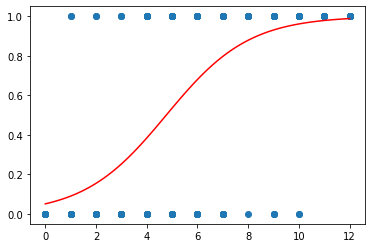

In [10]:
# x_values generieren und y_values vorhersagen
x_values = np.linspace(0, 12, 100).reshape(-1,1)
y_values = model.predict_proba(x_values)[:,1]


plt.scatter(x,y)
plt.plot(x_values, y_values, color = "r")
plt.show()

In [11]:
# hoffe es chunt ned!

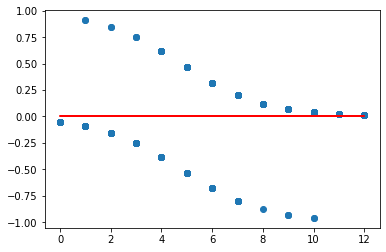

In [12]:
# Eifach us spass, no residue plotte
y_predict = model.predict_proba(x)[:,1]
residuen = y - y_predict

plt.scatter(x,residuen)
plt.plot(x, x * 0, c = "r")
plt.show()